<a href="https://colab.research.google.com/github/anudeeplearning/Market-Risk/blob/main/parametric_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are calculating the VaR using parametric method also known as variance-covariance method for a loan portfolio. 

The parametric linear VaR model is only applicable to a portfolio whose return or P&L is a linear function of its risk factor returns or its asset returns. The most basic assumption in the model is that risk factor returns are normally distributed, and that their joint distribution is multivariate normal, so the covariance matrix of risk factor returns is all that is required to capture the dependency between the risk factor returns.

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 6.4 MB 30.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf, numpy as np, pandas as pd, datetime as dt, matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
tickers = ['AAPL', 'FB', 'C','DIS','F','MSFT','MS','GME','TSLA','AMZN']
weights = np.array(10*[0.1])

In [ ]:
start = dt.datetime(2019,1,1)
end=dt.datetime.now()

df=yf.download(tickers,start,end)['Adj Close']
df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,38.221375,1539.130005,47.678246,107.654343,7.163055,135.679993,12.641105,36.652779,97.353905,62.023998
2019-01-03,34.414238,1500.280029,46.814281,105.046211,7.054250,131.740005,12.544387,35.999557,93.772461,60.071999
2019-01-04,35.883354,1575.390015,49.103336,108.286606,7.326263,137.949997,14.739896,37.469307,98.133743,63.537998
2019-01-07,35.803486,1629.510010,49.530869,109.225136,7.516674,138.050003,14.972020,37.841282,98.258881,66.991997
2019-01-08,36.486012,1656.579956,49.397259,110.074753,7.589211,142.529999,15.291192,37.605396,98.971344,67.070000
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,143.779999,2221.550049,54.090000,105.610001,13.120000,191.630005,128.460007,85.000000,265.899994,707.729980
2022-05-27,149.639999,2302.929932,53.619999,109.320000,13.630000,195.130005,137.210007,86.449997,273.239990,759.630005
2022-05-31,148.839996,2404.189941,53.410000,110.440002,13.680000,193.639999,124.739998,86.139999,271.869995,758.260010


In [ ]:
returns = df.pct_change()

In [ ]:
returns

,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TSLA
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.025242,-0.018121,-0.024227,-0.015190,-0.029039,-0.007651,-0.017822,-0.036788,-0.031472
2019-01-04,0.042689,0.050064,0.048897,0.030847,0.038560,0.047138,0.175019,0.040827,0.046509,0.057697
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.000725,0.015748,0.009927,0.001275,0.054361
2019-01-08,0.019063,0.016612,-0.002698,0.007779,0.009650,0.032452,0.021318,-0.006234,0.007251,0.001164
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,0.023200,0.040295,0.026376,0.022758,0.032258,0.042431,0.115395,0.033686,0.012875,0.074271
2022-05-27,0.040757,0.036632,-0.008689,0.035129,0.038872,0.018264,0.068115,0.017059,0.027604,0.073333
2022-05-31,-0.005346,0.043970,-0.003916,0.010245,0.003668,-0.007636,-0.090883,-0.003586,-0.005014,-0.001804


In [ ]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,FB,GME,MS,MSFT,TSLA
AAPL,0.000466,0.000290,0.000270,0.000210,0.000228,0.000345,0.000327,0.000282,0.000328,0.000440
AMZN,0.000290,0.000440,0.000156,0.000171,0.000135,0.000336,0.000246,0.000173,0.000281,0.000389
C,0.000270,0.000156,0.000723,0.000363,0.000458,0.000249,0.000466,0.000546,0.000249,0.000346
DIS,0.000210,0.000171,0.000363,0.000466,0.000309,0.000233,0.000231,0.000325,0.000211,0.000271
F,0.000228,0.000135,0.000458,0.000309,0.000796,0.000219,0.000527,0.000414,0.000194,0.000374
FB,0.000345,0.000336,0.000249,0.000233,0.000219,0.000663,0.000247,0.000257,0.000322,0.000399
GME,0.000327,0.000246,0.000466,0.000231,0.000527,0.000247,0.011450,0.000291,0.000229,0.000700
MS,0.000282,0.000173,0.000546,0.000325,0.000414,0.000257,0.000291,0.000586,0.000264,0.000309
MSFT,0.000328,0.000281,0.000249,0.000211,0.000194,0.000322,0.000229,0.000264,0.000381,0.000395
TSLA,0.000440,0.000389,0.000346,0.000271,0.000374,0.000399,0.000700,0.000309,0.000395,0.001823


In [ ]:
type(cov_matrix)

pandas.core.frame.DataFrame

In [ ]:
avg_returns = returns.mean()
avg_returns

AAPL    0.001832
AMZN    0.000789
C       0.000474
DIS     0.000265
F       0.001162
FB      0.000783
GME     0.007572
MS      0.001271
MSFT    0.001396
TSLA    0.003847
dtype: float64

In [ ]:
count = returns.count()[0]
count

861

In [ ]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @cov_matrix @ weights)

In [ ]:
port_mean

0.0019390381443523423

In [ ]:
port_std

0.021402077068679092

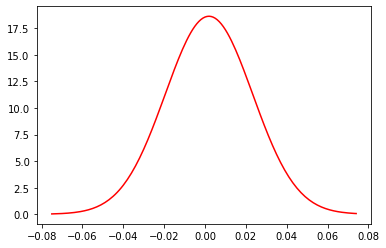

In [ ]:
x = np.arange(-.075,0.075, 0.001)
norm_dist = norm.pdf(x,port_mean,port_std)

plt.plot(x,norm_dist,color = 'r')
plt.show()

In [ ]:
confidence_interval = 0.05

VaR = norm.ppf(confidence_interval, port_mean, port_std)
VaR

-0.03326424594635941

In [ ]:
confidence_intervals = [0.01,0.1,1.0,2.5,5.0,10.0]
var = [norm.ppf(i/100,port_mean,port_std) for i in confidence_intervals]

In [ ]:
var

[-0.07765563929705818,
 -0.06419835183237313,
 -0.04784963834442749,
 -0.04000826210460926,
 -0.03326424594635941,
 -0.025488827228919538]

In [ ]:
df = pd.DataFrame(var, confidence_intervals,columns = ['VaR'])

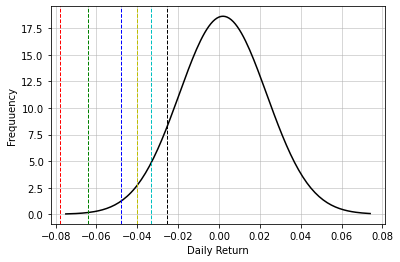

In [ ]:
plt.plot(x, norm_dist, color='k')

plt.axvline(df.loc[0.01]['VaR'], color='r', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[0.1]['VaR'], color='g', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[1]['VaR'], color='b', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[2.5]['VaR'], color='y', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[5]['VaR'], color='c', linestyle='dashed',linewidth=1)
plt.axvline(df.loc[10]['VaR'], color='k', linestyle='dashed',linewidth=1)

plt.ylabel('Frequuency')
plt.xlabel('Daily Return')
plt.grid(True,linewidth = 0.5)
plt.show()

In [ ]:
num_days =10
df.loc[1]['VaR'] * np.sqrt(num_days)

-0.15131384238371934

Regulators require 10 day 99VaR. We can see that the 10day 99VaR for the loan portfolio is -15.13%